In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
%matplotlib notebook

In [3]:
def func(z,c):
    return z**2 + c

In [4]:
def recursive(c):
    trajectory = []
    z, counter = 0, 0
    while np.absolute(z) < 2:
        if counter > 100:
            break
            
        z = func(z,c)
        trajectory.append(z)
        counter += 1
    
    return trajectory

In [5]:
def clean_ax(ax):
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['bottom'].set_visible(False)
        ax.spines['left'].set_visible(False)
    

In [7]:
c = np.complex(0.3 +0.1j)
trajectory = recursive(c)
trajectory
reals, imags = [a.real for a in trajectory], [a.imag for a in trajectory]

In [5]:
N = 13
x1, x2 = -1.666, -0.5 #0.2, 0.5
y1, y2 = -0.23949, -0.79073 #-0.2, 0.2
x_interval, y_interval = np.linspace(x1, x2, N), np.linspace(y1, y2, N)
xx, yy = np.meshgrid(x_interval,y_interval)

In [25]:
# julia island
N = 30
x1, y1 = -1.768778877, -0.001738828
x2, y2 = -1.768778821, -0.001738883
x_interval, y_interval = np.linspace(x1, x2, N), np.linspace(y1, y2, N)
xx, yy = np.meshgrid(x_interval,y_interval)

<IPython.core.display.Javascript object>


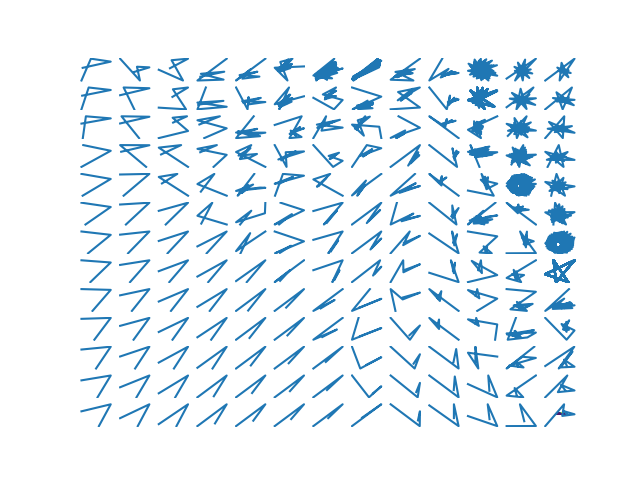

In [7]:
fig, axes = plt.subplots(N,N)
plt.box(False)
for i in range(N):
    for k in range(N):
        ax = axes[i,k]
        c = np.complex(xx[i,k],yy[i,k])
        trajectory = recursive(c)
        reals, imags = [a.real for a in trajectory], [a.imag for a in trajectory]
        ax.plot(reals, imags)
        clean_ax(ax)


        

In [127]:
#fig.savefig("figures/mandelbrot.png")

## Regular view of the Mandelbrot

In [48]:
def recursive_color(c, max_iter=100, z0=0):
    z, counter = z0, 0
    while np.absolute(z) < 5:
        if counter >= max_iter:
            break
        z = func(z,c)
        counter += 1
    return counter            

<IPython.core.display.Javascript object>


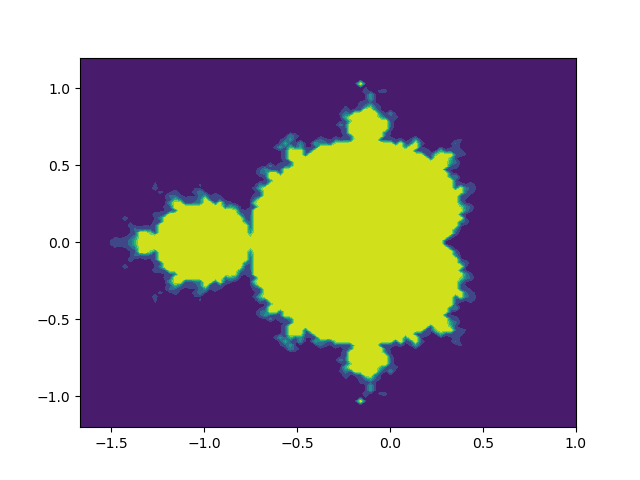

In [96]:
N = 100
x1, x2 = -1.666, 1 #0.2, 0.5
y1, y2 = -1.2, 1.2 #-0.2, 0.2
x_interval, y_interval = np.linspace(x1, x2, N), np.linspace(y1, y2, N)
xx, yy = np.meshgrid(x_interval,y_interval)
zz = np.zeros_like(xx)

fig, ax = plt.subplots()
for i in range(N):
    for k in range(N):
        c = np.complex(xx[i,k],yy[i,k])
        zz[i,k] = recursive_color(c)
ax.contourf(xx,yy,zz)

In [39]:
ax.imshow(zz)

## Plotly version

In [154]:
def get_data(N=100):
    x1, x2 = -1.666, 1  # 0.2, 0.5
    y1, y2 = -1.2, 1.2  # -0.2, 0.2
    x_interval, y_interval = np.linspace(x1, x2, N), np.linspace(y1, y2, N)
    xx, yy = np.meshgrid(x_interval, y_interval)
    zz = np.zeros_like(xx)

    for i in range(N):
        for k in range(N):
            c = np.complex(xx[i, k], yy[i, k])
            zz[i, k] = recursive_color(c)


    return zz


In [51]:
def mandelbrot_figure():
    figure = go.Figure(
        data=go.Heatmap(z=get_data()),
        layout=go.Layout(width=800, height=700)
    )
    return figure

In [52]:
mandelbrot_figure()

In [58]:
%timeit recursive_color(c)

23.6 µs ± 3.01 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [123]:
cs = np.zeros_like(xx, dtype=complex)
for i in range(N):
        for k in range(N):
            cs[i,k] = np.complex(xx[i, k], yy[i, k])

In [76]:
%timeit get_data()

1.79 s ± 27.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [117]:
iters = np.zeros_like(cs)
z = np.zeros_like(cs)
for i in range(100):
    z = z**2 + cs
    a = np.abs(z)
    selection = (a >= 2) & (iters == 0)
    sel = np.where(selection)
    iters[sel] = i
    if selection.all():
        break

c:\users\vegar\.virtualenvs\completeness-gg3zoghz\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning:

overflow encountered in square

c:\users\vegar\.virtualenvs\completeness-gg3zoghz\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning:

invalid value encountered in square

c:\users\vegar\.virtualenvs\completeness-gg3zoghz\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning:

invalid value encountered in greater_equal

c:\users\vegar\.virtualenvs\completeness-gg3zoghz\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning:

overflow encountered in absolute



In [128]:
%timeit numpy_recursive(cs)

c:\users\vegar\.virtualenvs\completeness-gg3zoghz\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning:

overflow encountered in square

c:\users\vegar\.virtualenvs\completeness-gg3zoghz\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning:

invalid value encountered in square

c:\users\vegar\.virtualenvs\completeness-gg3zoghz\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning:

invalid value encountered in greater_equal

c:\users\vegar\.virtualenvs\completeness-gg3zoghz\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning:

overflow encountered in absolute



24.3 ms ± 2.66 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


# Numpy style

In [26]:
def numpy_recursive(cs, z0=0):
    iters = np.zeros_like(cs, dtype=int)
    z = z0*np.ones_like(cs)
    for i in range(100):
        z = z**2 + cs
        a = np.abs(z)
        selection = (a >= 2) & (iters == 0)
        sel = np.where(selection)
        iters[sel] = i
    
    #iters[iters == 0] = i
    
    return iters

In [23]:
def get_data_numpy(N=100):
    x1, x2 = -1.666, 1  # 0.2, 0.5
    y1, y2 = -1.2, 1.2  # -0.2, 0.2
    x_interval, y_interval = np.linspace(x1, x2, N), np.linspace(y1, y2, N)
    xx, yy = np.meshgrid(x_interval, y_interval)
    cs = np.zeros_like(xx, dtype=complex)
    for i in range(N):
        for k in range(N):
            cs[i,k] = np.complex(xx[i, k], yy[i, k])
    
    return numpy_recursive(cs)


In [155]:
%timeit get_data()

1.05 s ± 79.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [156]:
%timeit get_data_numpy()

c:\users\vegar\.virtualenvs\completeness-gg3zoghz\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning:

overflow encountered in square

c:\users\vegar\.virtualenvs\completeness-gg3zoghz\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning:

invalid value encountered in square

c:\users\vegar\.virtualenvs\completeness-gg3zoghz\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning:

invalid value encountered in greater_equal

c:\users\vegar\.virtualenvs\completeness-gg3zoghz\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning:

overflow encountered in absolute



37.1 ms ± 6.6 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [ ]:
fig = go.Figure(
        data=go.Heatmap(z=get_data()),
        layout=go.Layout(width=800, height=700))
fig

In [181]:
data = get_data_numpy(N=600)

c:\users\vegar\.virtualenvs\completeness-gg3zoghz\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning:

overflow encountered in square

c:\users\vegar\.virtualenvs\completeness-gg3zoghz\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning:

invalid value encountered in square

c:\users\vegar\.virtualenvs\completeness-gg3zoghz\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning:

overflow encountered in absolute

c:\users\vegar\.virtualenvs\completeness-gg3zoghz\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning:

invalid value encountered in greater_equal



In [185]:
fig = go.Figure(
        data=go.Heatmap(z=data, hoverinfo="none", showscale=False, colorscale='solar'),
        layout=go.Layout(width=800, height=700))
fig

In [168]:
fig.relayoutData 

AttributeError: 'Figure' object has no attribute 'relayoutData'

# Optimized stuff

In [6]:
import numpy as np
from numba import jit, vectorize, guvectorize, float64, complex64, int32, float32

@jit(int32(complex64, int32))
def mandelbrot(c,maxiter):
    nreal = 0
    real = 0
    imag = 0
    for n in range(maxiter):
        nreal = real*real - imag*imag + c.real
        imag = 2* real*imag + c.imag
        real = nreal;
        if real * real + imag * imag > 4.0:
            return n
    return 0

@guvectorize([(complex64[:], int32[:], int32[:])], '(n),()->(n)',target='parallel')
def mandelbrot_numpy(c, maxit, output):
    maxiter = maxit[0]
    for i in range(c.shape[0]):
        output[i] = mandelbrot(c[i],maxiter)
        
def mandelbrot_set2(xmin,xmax,ymin,ymax,width,height,maxiter):
    r1 = np.linspace(xmin, xmax, width, dtype=np.float32)
    r2 = np.linspace(ymin, ymax, height, dtype=np.float32)
    c = r1 + r2[:,None]*1j
    n3 = mandelbrot_numpy(c,maxiter)
    return (r1,r2,n3.T)

In [22]:
%timeit mandelbrot_set2(-2.0,0.5,-1.25,1.25,1000,1000,100)

93.9 ms ± 2.24 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [27]:
%timeit get_data_numpy(N=1000)

c:\users\vegar\.virtualenvs\mandelbrot-daen39az\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning:

overflow encountered in square

c:\users\vegar\.virtualenvs\mandelbrot-daen39az\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning:

invalid value encountered in square

c:\users\vegar\.virtualenvs\mandelbrot-daen39az\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning:

overflow encountered in absolute

c:\users\vegar\.virtualenvs\mandelbrot-daen39az\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning:

invalid value encountered in greater_equal



6 s ± 84.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [64]:
colorscale

[[0, 'rgb(0, 0, 0)'],
 [0.01, 'rgb(0 ,0, 0)'],
 [0.01, 'rgb(25, 7, 26)'],
 [0.02, 'rgb(25, 7, 26)'],
 [0.02, 'rgb(9, 1, 47)'],
 [0.03, 'rgb(9, 1, 47)'],
 [0.03, 'rgb(4, 4, 73)'],
 [0.04, 'rgb(4, 4, 73)'],
 [0.04, 'rgb(12, 44, 138)'],
 [0.05, 'rgb(12, 44, 138)'],
 [0.05, 'rgb(57, 125, 209)'],
 [0.06, 'rgb(57, 125, 209)'],
 [0.06, 'rgb(211, 236, 248)'],
 [0.07, 'rgb(211, 236, 248)'],
 [0.07, 'rgb(248, 201, 95)'],
 [0.08, 'rgb(248, 201, 95)'],
 [0.08, 'rgb(255, 170, 0)'],
 [0.09, 'rgb(255, 170, 0)'],
 [0.09, 'rgb(60, 30, 15)'],
 [0.1, 'rgb(60, 30, 15)'],
 [0.1, 'rgb(25, 7, 26)'],
 [0.11, 'rgb(25, 7, 26)'],
 [0.11, 'rgb(9, 1, 47)'],
 [0.12, 'rgb(9, 1, 47)'],
 [0.12, 'rgb(4, 4, 73)'],
 [0.13, 'rgb(4, 4, 73)'],
 [0.13, 'rgb(12, 44, 138)'],
 [0.14, 'rgb(12, 44, 138)'],
 [0.14, 'rgb(57, 125, 209)'],
 [0.15, 'rgb(57, 125, 209)'],
 [0.15, 'rgb(211, 236, 248)'],
 [0.16, 'rgb(211, 236, 248)'],
 [0.16, 'rgb(248, 201, 95)'],
 [0.17, 'rgb(248, 201, 95)'],
 [0.17, 'rgb(255, 170, 0)'],
 [0.18, 'rgb(255

# Find nice colors

In [38]:
fig = go.Figure()
fig.add_trace(go.Heatmap(
    z=[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]],
    colorscale=[
        # Let first 10% (0.1) of the values have color rgb(0, 0, 0)
        [0, "rgb(60, 30, 15)"],
        [0.1, "rgb(60, 30, 15)"],

        # Let values between 10-20% of the min and max of z
        # have color rgb(20, 20, 20)
        [0.1, "rgb(25, 7, 26)"],
        [0.2, "rgb(25, 7, 26)"],

        # Values between 20-30% of the min and max of z
        # have color rgb(40, 40, 40)
        [0.2, "rgb(9, 1, 47)"],
        [0.3, "rgb(9, 1, 47)"],

        [0.3, "rgb(4, 4, 73)"],
        [0.4, "rgb(4, 4, 73)"],

        [0.4, "rgb(12, 44, 138)"],
        [0.5, "rgb(12, 44, 138)"],

        [0.5, "rgb(57, 125, 209)"],
        [0.6, "rgb(57, 125, 209)"],

        [0.6, "rgb(211, 236, 248)"],
        [0.7, "rgb(211, 236, 248)"],

        [0.7, "rgb(248, 201, 95)"],
        [0.8, "rgb(248, 201, 95)"],

        [0.8, "rgb(255, 170, 0)"],
        [0.9, "rgb(255, 170, 0)"],

        [0.9, "rgb(0, 0, 0)"],
        [1.0, "rgb(0, 0, 0)"]
    ]))

fig.show()


In [133]:
def create_colorscale(max_iter, switch_nr):
    
    """
    Creates colorscale for plotting of the Mandelbrot set
    :param max_iter: Iterations before loop breaks when calculating if z is in
    the mandelbrot
    :param switch_nr: Color shifts every switch_nr integer. 
    :return: colorscale to use in plotly heatmap
    """
    color_list = ["rgb(60, 30, 15)", "rgb(25, 7, 26)", "rgb(9, 1, 47)",
                  "rgb(4, 4, 73)", "rgb(12, 44, 138)", "rgb(57, 125, 209)",
                  "rgb(211, 236, 248)", "rgb(248, 201, 95)", "rgb(255, 170, 0)"]
    dx = (1 / max_iter) * switch_nr
    colorscale = [[0, "rgb(0, 0, 0)"], [dx, "rgb(0 ,0, 0)"]]

    for i in range(1, int(np.ceil(1/dx))):
        colorscale.append([i * dx, color_list[i % len(color_list)]])
        if (i+1)*dx < 1:
            colorscale.append([(i + 1) * dx, color_list[(i) % len(color_list)]])
        else: 
            colorscale.append([1, color_list[(i) % len(color_list)]])
    
    return colorscale

In [132]:
colorscale[-1][0] != 1:
    colorscale.append([colorscale[-1], color_list])

False

In [135]:
colorscale

[[0, 'rgb(0, 0, 0)'],
 [0.25, 'rgb(0 ,0, 0)'],
 [0.25, 'rgb(25, 7, 26)'],
 [0.5, 'rgb(25, 7, 26)'],
 [0.5, 'rgb(9, 1, 47)'],
 [0.75, 'rgb(9, 1, 47)'],
 [0.75, 'rgb(4, 4, 73)'],
 [1, 'rgb(4, 4, 73)']]

In [137]:
max_iter = 80
colorscale = create_colorscale(max_iter,6)
fig = go.Figure()
fig.add_trace(go.Heatmap(
    z=[np.arange(max_iter)],
    colorscale=colorscale))

fig.show()


![](mandelbrot-app-gif.gif)